# Lecture 15

Lesson Objectives:
- Modeling with ODE Solvers


The point of today's lecture is to work in groups on a few modeling problems involving ODES.

____ 

### SIR Models

SIR Models are compartmental models that describe spread of infectiors diesases within a population, assuming that

a) the population is large enough to make individual fluctuations irrelevant
b) the time of observation is short enough to justify neglecting the effect of births and deaths
c) There is no latent period of infection (it doesn't go undetected)
d) Recovery from the infection give immunity

These assumptions can be played around with in more detailed models. Generally, there are three compartments with SIR models

$S(t)$: Susceptible individuals, people who have no infection nor immunity
$I(t)$: Infected individuals
$R(t)$: Recovered individuals, immune to the disease

We assume that the rate of infection is jointly proportional with respect to the number of infected people and susceptible people. We also assume that the recovery rate is constant per capita of number of infected

$$\frac{dS}{dt}=-\alpha S I$$

The number of infected people increases if a susceptible gets infected. But infected people also recover at a certain rate, leading to a loss of the number of infected.

$$\frac{dI}{dt}=\alpha S I -\beta I$$

The number of recovered people depends on the rate of recovery for infected people.

$$\frac{dR}{dt}=\beta I$$

Note that if we assume a fixed population, then
$$\frac{dS}{dt}+\frac{dI}{dt}+\frac{dR}{dt}=0$$

**Question 1**: Under what conditions does the number of infected decrease? Are there any initial conditions that will cause the infection to dissipate?


**Question 2** What if the recovered lose their immunity over time? How could incorporate this detail into our model? 

Incorporate these changes into code. Set up a system in module below with five out of one hundred people infected. Let $S(0)=95$ and $I(0)=5$ with $R(0)=0$. Choose an infection rate of $\alpha=1$ and a recovery rate of $\beta=5$ and solve over an interval $[0,10]$. Let's set the rate at which recovered change to susceptible at $\gamma R$, and vary $\gamma$.  





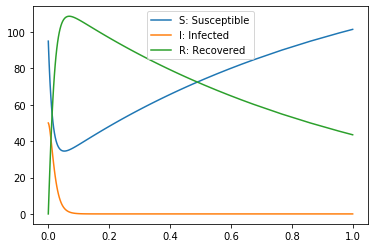

In [27]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np


def SIR(t,Z):
    alpha=1
    beta=100
    gama=1
    immune=0
    S,I,R=Z
    f1=-alpha*S*I+gama*R-immune*S
    f2=alpha*S*I-beta*I
    f3=beta*I-gama*R+immune*S
    return [f1,f2,f3]

sol = solve_ivp(SIR, [0, 1], [95, 50, 0],'BDF',rtol=.0001)

plt.plot(sol.t,sol.y[0,:],sol.t,sol.y[1,:],sol.t,sol.y[2,:])
plt.legend(['S: Susceptible','I: Infected','R: Recovered'])


**Question 3** Let's assume that the infection rate is seasonally dependent. How could we model this? Incorporate this into our model above.


**Question 4** How would herd immunity be represented with our model?

___ 

### Chemical Kinetics Models


Chemical Kinetics can be modeled as a system. Let's say we have three chemical species $[A], [B],$ and $[C]$. The chemical kinetics of the systems are dictated as follows

$$\frac{d[A]}{dt}=-k_{1}[A]$$
$$\frac{d[B]}{dt}=k_{1}[A]-k_{2}[B]$$
$$\frac{d[C]}{dt}=k_{2}[B]$$

Let $[A](0)=[B](0)=[C](0)=1$.

**Question 1**. Compute the Jacobian of the system. What are its eigenvalues (you can use numpy)?


**Question 2** Set $k_1=1$ but vary $k_2=10,100,1000$. How does the solution change?

The chemical reactions could be nonlinear as well

$$\frac{d[A]}{dt}=-k_{1}[A]+k_{2}[B][C]$$
$$\frac{d[B]}{dt}=k_{1}[A]-k_{2}[B][C]-k_{3}[B]^2$$
$$\frac{d[C]}{dt}=k_{2}[B]^2$$

Let $k_{1}=4\times10^{-2}$, $k_{2}=10^{4}$, and $k_{3}=3\times10^{7}$.

**Question 3** Test the different solvers, stiff and non-stiff. Examine the runtime as a function of error tolerance.


In [ ]:
def ABC(t,Z):
    k1=1
    k2=100
    k3=0
    A,B,C=Z
    f1=-k1*A
    f2=k1*A-k2*B
    f3=k2*B
    return [f1,f2,f3]

sol = solve_ivp(SIR, [0, 1], [1, 1,1],'BDF',rtol=.0001)

plt.plot(sol.t,sol.y[0,:],sol.t,sol.y[1,:],sol.t,sol.y[2,:])
plt.legend(['S: Susceptible','I: Infected','R: Recovered'])